In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import seaborn as sns
from functions import create_base, add_basket_info, add_coupon_info
from functions import get_baskets, get_coupons, get_prediction_index, get_3_files
from functions import split_4_way

In [2]:
baskets, coupons, prediction_index = get_3_files()
baskets = baskets[baskets['customer'] < 2000]

In [112]:
base = create_base(customers=range(1900,2000))
base['basket'] = base['week'].astype(str) + '_' +base['customer'].astype(str)
base = add_basket_info(base, baskets)
base = add_coupon_info(base, baskets, coupons)
base

,week,customer,product,basket,price,isBought,dGiven,isGiven,isUsed
0,0,1900,0,0_1900,0,False,0,False,False
1,0,1900,1,0_1900,0,False,0,False,False
2,0,1900,2,0_1900,0,False,0,False,False
3,0,1900,3,0_1900,0,False,0,False,False
4,0,1900,4,0_1900,0,False,0,False,False
...,...,...,...,...,...,...,...,...,...
2249995,89,1999,245,89_1999,549,True,0,False,False
2249996,89,1999,246,89_1999,0,False,30,True,False
2249997,89,1999,247,89_1999,0,False,0,False,False
2249998,89,1999,248,89_1999,0,False,0,False,False


In [67]:
#x_train, y_train, x_test, y_test = split_4_way(base, target_col='isBought', unkwown_week=89)

# Creating categories

<AxesSubplot:>

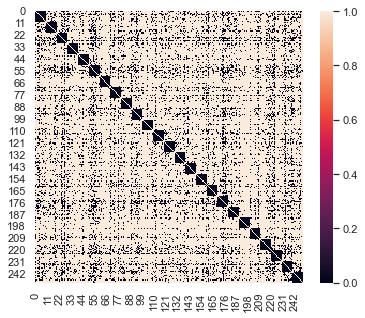

In [86]:
n_baskets = base['basket'].nunique()

matrix = np.matrix([np.array(base.iloc[x*250:x*250+250,5]) for x in range(n_baskets)]).astype(int)
occurency_matrix = matrix.T.dot(matrix)
occurency_matrix[occurency_matrix > 1] = 1

sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(occurency_matrix, annot=False)

<AxesSubplot:>

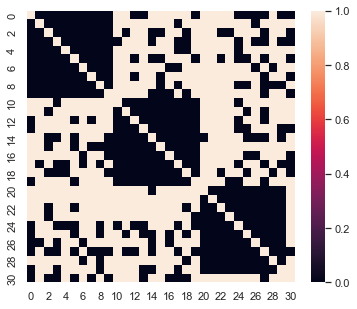

In [84]:
sns.heatmap(occurency_matrix[:31,:31], annot=False)

In [116]:
base['category'] = (base['product'] / 10).astype(int)
base

,week,customer,product,basket,price,isBought,dGiven,isGiven,isUsed,category
0,0,1900,0,0_1900,0,False,0,False,False,0
1,0,1900,1,0_1900,0,False,0,False,False,0
2,0,1900,2,0_1900,0,False,0,False,False,0
3,0,1900,3,0_1900,0,False,0,False,False,0
4,0,1900,4,0_1900,0,False,0,False,False,0
...,...,...,...,...,...,...,...,...,...,...
2249995,89,1999,245,89_1999,549,True,0,False,False,24
2249996,89,1999,246,89_1999,0,False,30,True,False,24
2249997,89,1999,247,89_1999,0,False,0,False,False,24
2249998,89,1999,248,89_1999,0,False,0,False,False,24


In [118]:
base['basket']==1

0          False
1          False
2          False
3          False
4          False
           ...  
2249995    False
2249996    False
2249997    False
2249998    False
2249999    False
Name: basket, Length: 2250000, dtype: bool

In [140]:
baskets

,week,customer,product,price
0,0,0,71,629
1,0,0,91,605
2,0,0,116,715
3,0,0,123,483
4,0,0,157,592
...,...,...,...,...
68091869,89,1999,144,562
68091870,89,1999,158,566
68091871,89,1999,192,549
68091872,89,1999,213,592


In [148]:
(
(baskets.groupby(['customer','product'])['week'].count() / 90)
.reset_index()
.rename(columns={'week':'probability'})
).describe()

,customer,probability
count,500000.000000,500000.000000
mean,999.500000,0.030638
std,577.350774,0.092814
min,0.000000,0.000000
25%,499.750000,0.000000
50%,999.500000,0.000000
75%,1499.250000,0.011111
max,1999.000000,1.000000


In [146]:
baskets

,week,customer,product,price
0,0,0,71,629
1,0,0,91,605
2,0,0,116,715
3,0,0,123,483
4,0,0,157,592
...,...,...,...,...
68091869,89,1999,144,562
68091870,89,1999,158,566
68091871,89,1999,192,549
68091872,89,1999,213,592


In [145]:
baskets[(baskets['customer']==1999) & (baskets['product']==246)]

,week,customer,product,price
